# Titanic Survival Prediction

#### 1. Introduction & Objective
This project will analyze the Kaggle titanic data set.
#### 2. Importing Libraries & Data
- pandas
- numpy
- matplotlib
- seaborn
#### 3. Exploratory Data Analysis
- Check for missing values
- Visualize survival by gender, class, age, etc.
#### 4. Data Cleaning
- Fill or drop null values
- Encode categorical variables
#### 5. Model Building
- Logistic Regression or Decision Tree
#### 6. Evaluation
- Accuracy, Confusion Matrix
#### 7. Conclusion
What you found & what could be done next

## 2. Importing Libraries & Data

In [87]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import zipfile

# Define File Path
zip_path = 'titanic.zip'

# Extract all contents into current directory
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall()

# Load the training and testing csv to a dataframe
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# Preview the Data
print("Training Data Preview:")
display(df_train.head())
print("Test Data Preview:")
display(df_test.head())



Training Data Preview:


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

Test Data Preview:


PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

## 3. Exploratory Data Analysis

In [88]:
display(df_train.info())
display(df_train.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### 3.1 Explore Categorical Columns

In [89]:
# Identify and Display Categorical Columns
categorical_cols = df_train.select_dtypes(include=['object','category']).columns
print(categorical_cols)
df_train['Sex'].value_counts()

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


Sex
male      577
female    314
Name: count, dtype: int64

In [90]:
# Explore Data Entries for Categorical Columncs
display(df_train['Sex'].value_counts())
display(df_train['Cabin'].value_counts())
display(df_train['Embarked'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

### 3.2 Convert Categorical Columns and Ensure Correct Data Types

In [93]:
#====== Training Data ======#
# Encode Categorical with One-Hot Encoding
df_encoded = pd.get_dummies(df_train, columns = ['Sex', 'Embarked'])
df_encoded.dtypes

# Change Survived to a Boolean
df_encoded['Survived'] = df_encoded['Survived'].astype(bool)

# Move Surivived Column to the End Target Value
survived_col = df_encoded.pop('Survived')
df_encoded['Survived'] = survived_col

#====== Test Data ======#
# Define columns for test data
bool_cols_test = df_test_kept.select_dtypes(include='bool').columns
numeric_cols_test = df_test_kept.select_dtypes(include=['int64', 'float64']).columns.drop('PassengerId')

# Apply the same scaler (DO NOT re-fit)
df_test_normalized_numeric = pd.DataFrame(
    scaler.transform(df_test_kept[numeric_cols_test]),
    columns=numeric_cols_test,
    index=df_test_kept.index
)

# Combine with PassengerId and boolean cols
df_test_prepared = pd.concat([
    df_test_kept[['PassengerId']],
    df_test_normalized_numeric,
    df_test_kept[bool_cols_test]
], axis=1)


### 3.3 Drop Unimportant Categorical Columns

In [94]:
df_kept =df_encoded.drop(columns=['Cabin','Name','Ticket'])
df_kept.head()

df_test_kept = df_test_encoded.drop(columns=['Cabin', 'Name', 'Ticket'])

## 4. Preprocess Data

### 4.1 Handle Missing Data

In [95]:
# Identify Missing Values
display(df_kept.isnull().sum())
display(df_test_kept.isnull().sum())

PassengerId      0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
Sex_female       0
Sex_male         0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
Survived         0
dtype: int64

PassengerId     0
Pclass          0
Age            86
SibSp           0
Parch           0
Fare            1
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

### 4.2 Fill the Missing Fare Entry in Test Data

In [96]:
# Fill NaN from Fare with Mean
df_test_kept['Fare'] = df_test_kept['Fare'].fillna(df_test_kept['Fare'].mean())
df_test_kept.isnull().sum()

PassengerId     0
Pclass          0
Age            86
SibSp           0
Parch           0
Fare            0
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

### 4.3 Fill the Missing Age Columns

Pclass        -0.369226
SibSp         -0.308247
Parch         -0.189119
Sex_female    -0.093254
Survived      -0.077221
Embarked_S    -0.032523
Embarked_Q    -0.022405
Embarked_C     0.036261
PassengerId    0.036847
Sex_male       0.093254
Fare           0.096067
Name: Age, dtype: float64


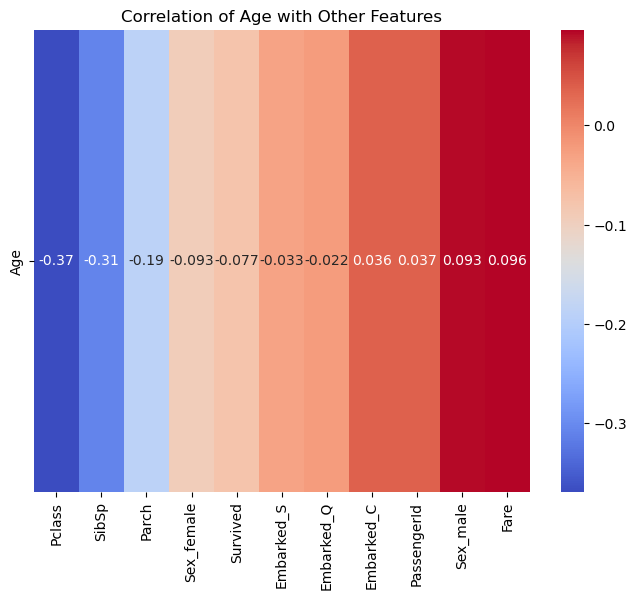

In [97]:
# Identify Correlation between Age and Other Features
age_features = df_kept.columns.drop(['Age']).tolist()
age_correlations = df_kept[age_features + ['Age']].corr()
age_only_correlations = age_correlations['Age'].drop('Age').sort_values(ascending = True)
print(age_only_correlations)

# Plot a Heat Map to Identify Correlation
plt.figure(figsize=(8,6))
sns.heatmap(age_only_correlations.to_frame().T, annot=True, cmap='coolwarm')
plt.title("Correlation of Age with Other Features")
plt.show()


### 4.4 Use a Regression Model to Fill Age Based on Pclass and SibSp

In [98]:
from sklearn.linear_model import LinearRegression

# Select Other Features with a Relative High Correlation to Age
age_chosen_features = ['Pclass', 'SibSp', 'Parch']
df_age_model = df_kept[age_chosen_features + ['Age']].copy()

# Split into Known Age for training and Missing Age for imputation
age_train = df_age_model[df_age_model['Age'].notnull()]
age_predict = df_age_model[df_age_model['Age'].isnull()]

# Train Linear Regression Model
X_age_train = age_train[age_chosen_features]
Y_age_train = age_train['Age']
lm = LinearRegression()
lm.fit(X_age_train, Y_age_train)

# Apply Linear Regression to Predict Missing Ages in Training Data
X_age_predict = age_predict[age_chosen_features]
Y_age_predict = lm.predict(X_age_predict) 
df_kept.loc[df_kept['Age'].isnull(), 'Age'] = Y_age_predict

# Apply Linear Regression to Predict Missing Ages in Test Data
# Find rows in test data with missing Age
test_age_missing = df_test_kept[df_test_kept['Age'].isnull()]

# Use same features and model from training
X_test_age_missing = test_age_missing[age_chosen_features]
Y_test_age_predict = lm.predict(X_test_age_missing)

# Fill in missing Age values
df_test_kept.loc[df_test_kept['Age'].isnull(), 'Age'] = Y_test_age_predict


### 4.5 Check Quality of Imputation and if Missing Values Persist


In [99]:
from sklearn.metrics import mean_squared_error

#Calculate RMSE
Y_pred_train = lm.predict(X_age_train)
rsme = np.sqrt(mean_squared_error(Y_age_train, Y_pred_train))
print(f"Training rsme: {rsme:.2f}")

#Check if any Missing Values Persist
display(df_kept.isnull().sum())
df_kept.dtypes

Training rsme: 12.80


PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
Survived       0
dtype: int64

PassengerId      int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Sex_female        bool
Sex_male          bool
Embarked_C        bool
Embarked_Q        bool
Embarked_S        bool
Survived          bool
dtype: object

### 4.6 Normalize Data

In [100]:
from sklearn.preprocessing import StandardScaler

# Ensure booleans are stored as 0 or 1
bool_cols = df_kept.select_dtypes(include='bool').columns

#Initalize and select columns b6y type
numeric_cols = df_kept.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = numeric_cols.drop('PassengerId')
scaler = StandardScaler()

# Normalize numeric columns in Training Data
df_normalized_numeric = pd.DataFrame(
    scaler.fit_transform(df_kept[numeric_cols]),
    columns = numeric_cols,
    index = df_kept.index
)

# Combine normalized numeric data with Passenger Id and boolean columns in Training Data
df_prepared = pd.concat([
    df_kept[['PassengerId']],
    df_normalized_numeric, 
    df_kept[bool_cols]], 
    axis = 1)
display(df_prepared.head())


# Re-define boolean columns for test data
bool_cols_test = df_test_kept.select_dtypes(include='bool').columns

# Re-define numeric columns for test data (exclude PassengerId)
numeric_cols_test = df_test_kept.select_dtypes(include=['int64', 'float64']).columns.drop('PassengerId')

# Normalize test numeric columns using training scaler
df_test_normalized_numeric = pd.DataFrame(
    scaler.transform(df_test_kept[numeric_cols_test]),
    columns=numeric_cols_test,
    index=df_test_kept.index
)

# Combine normalized values with PassengerId and boolean cols
df_test_prepared = pd.concat([
    df_test_kept[['PassengerId']],
    df_test_normalized_numeric,
    df_test_kept[bool_cols_test]
], axis=1)


display(df_test_prepared.head())

PassengerId    Pclass       Age     SibSp     Parch      Fare  Sex_female  \
0            1  0.827377 -0.535873  0.432793 -0.473674 -0.502445       False   
1            2 -1.566107  0.639940  0.432793 -0.473674  0.786845        True   
2            3  0.827377 -0.241919 -0.474545 -0.473674 -0.488854        True   
3            4 -1.566107  0.419475  0.432793 -0.473674  0.420730        True   
4            5  0.827377  0.419475 -0.474545 -0.473674 -0.486337       False   

   Sex_male  Embarked_C  Embarked_Q  Embarked_S  Survived  
0      True       False       False        True     False  
1     False        True       False       False      True  
2     False       False       False        True      True  
3     False       False       False        True      True  
4      True       False       False        True     False

PassengerId    Pclass       Age     SibSp     Parch      Fare  Sex_female  \
0          892  0.827377  0.382731 -0.474545 -0.473674 -0.490783       False   
1          893  0.827377  1.301334  0.432793 -0.473674 -0.507479        True   
2          894 -0.369365  2.403658 -0.474545 -0.473674 -0.453367       False   
3          895  0.827377 -0.168431 -0.474545 -0.473674 -0.474005       False   
4          896  0.827377 -0.535873  0.432793  0.767630 -0.401017        True   

   Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0      True       False        True       False  
1     False       False       False        True  
2      True       False        True       False  
3      True       False       False        True  
4     False       False       False        True

### 5. Exploratory Data

In [101]:
# Display a Correlation Heat Map
plt.figure(figsize=(10,8))
sns.heatmap(df_prepared.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## Model Creation

### 5.1 Define Training Data

In [102]:
#Set up Features and Targets 
X_train = df_prepared[['Pclass', 'Fare', 'Sex_female', 'Embarked_C', 'Embarked_S']]
Y_train = df_prepared['Survived']

### 5.2 Train the Model

In [103]:
# Train Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

### 5.3 Make Predictions

In [113]:
Y_test = lr.predict(df_test_prepared[X_train.columns])
Y_test = Y_test.astype(int)

## 6. Submission

In [115]:
submission = pd.DataFrame({
    'PassengerId': df_test_prepared['PassengerId'],
    'Survived': Y_test
})
submission.to_csv('submission.csv', index=False)